### Notebook for plotting the figures for the Adaptation section

In [92]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import yaml
from pathlib import Path

## COUNTRY 

### USER INPUTS

In [300]:
# Set figure parameters
country = 'KEN'
ADM_level = 'ADM2'
model = 'jrc'
# Flood protection parameters
fp_urban = '30'
fp_RP = '100'
# Dry-proofing parameters
dry_proof_unit_cost = 0.1 # to get dry-proofing costs... % of total building cost
# Relocation parameters
rl_urban = '13'
relocation_cost = 3 # factor to multiply relocated capstock
# Benefit-Cost analysis parameters
time_period = 50 # years
discount_rate = 0.03

### LOAD DATA

In [301]:
# Set paths
base_path = Path(r"C:\Users\Mark.DESKTOP-UFHIN6T\Projects\flood-wealth")
baseline_path = (base_path / "data" / "results" / "flood_risk" / "summary" / "countries" 
                 / country / f"{country}_{ADM_level}_metrics_{model}-flood_AALs_baseline_capstock.gpkg")
adapted_fp_path = (base_path / "data" / "results" / "flood_risk" / "summary" / "countries"
               / country / f"{country}_{ADM_level}_metrics_{model}-flood_AALs_adapted_fp_rp{fp_RP}_duc{fp_urban}_capstock.gpkg")
cost_fp_path = (base_path / "data" / "results" / "adaptation" / "costs" / "countries"
            / country / f"{country}_adaptation-cost_fp_rp{fp_RP}_duc{fp_urban}_{ADM_level}.gpkg")
adapted_dp_path = (base_path / "data" / "results" / "flood_risk" / "summary" / "countries"
               / country / f"{country}_{ADM_level}_metrics_{model}-flood_AALs_adapted_dp_capstock.gpkg")
cost_dp_path = (base_path / "data" / "results" / "adaptation" / "costs" / "countries"
            / country / f"{country}_adaptation-cost_dp_m-{model}_{ADM_level}.gpkg")
adapted_rl_path = (base_path / "data" / "results" / "flood_risk" / "summary" / "countries"
               / country / f"{country}_{ADM_level}_metrics_{model}-flood_AALs_adapted_rl_duc{rl_urban}_capstock.gpkg")
cost_rl_path = (base_path / "data" / "results" / "adaptation" / "costs" / "countries"
            / country / f"{country}_adaptation-cost_rl_m-{model}_duc{rl_urban}_{ADM_level}.gpkg")
baseline_ci = (base_path / "data" / "results" / "social_flood" / "countries"
              / country / "inequality_metrics" / f"{country}_{ADM_level}_admin-decomposed_metrics_{model}-flood_protected_AAR_V-JRC_S-rwi.gpkg")
adapted_fp_ci = (base_path / "data" / "results" / "social_flood" / "countries"
              / country / "inequality_metrics" / f"{country}_{ADM_level}_admin-decomposed_metrics_{model}-flood_adapted_AAR_V-JRC_S-rwi_fp_rp{fp_RP}_duc{fp_urban}.gpkg")
adapted_dp_ci = (base_path / "data" / "results" / "social_flood" / "countries"
              / country / "inequality_metrics" / f"{country}_{ADM_level}_admin-decomposed_metrics_{model}-flood_adapted_AAR_V-JRC_S-rwi_dp.gpkg")
adapted_rl_ci = (base_path / "data" / "results" / "social_flood" / "countries"
              / country / "inequality_metrics" / f"{country}_{ADM_level}_admin-decomposed_metrics_{model}-flood_adapted_AAR_V-JRC_S-rwi_rl_duc{rl_urban}.gpkg")

In [302]:
# Load data
baseline = gpd.read_file(baseline_path)
adapted_fp = gpd.read_file(adapted_fp_path)
cost_fp = gpd.read_file(cost_fp_path)
adapted_dp = gpd.read_file(adapted_dp_path)
cost_dp = gpd.read_file(cost_dp_path)
adapted_rl = gpd.read_file(adapted_rl_path)
cost_rl = gpd.read_file(cost_rl_path)
ci = gpd.read_file(baseline_ci)
fp_ci = gpd.read_file(adapted_fp_ci)
dp_ci = gpd.read_file(adapted_dp_ci)
rl_ci = gpd.read_file(adapted_rl_ci)

# Adjust flood-protection cost from millions to actual value
cost_fp['adaptation_cost']= cost_fp['adj_adaptation_cost']*1e6
# cost_fp['adj_adaptation_cost']*=1e6
# Add dry-proofing costs
cost_dp['adaptation_cost'] = cost_dp['sum_res_capstock'] * dry_proof_unit_cost
# Add relocation costs
cost_rl['adaptation_cost'] = cost_rl['capstock_relocated'] * relocation_cost

In [303]:
# Calculate inequality metric impacts
ci_fp_diff = ci[['shapeName', 'geometry']].copy()
ci_dp_diff = ci[['shapeName', 'geometry']].copy()
ci_rl_diff = ci[['shapeName', 'geometry']].copy()
ci_fp_diff['Nat_CI_diff'] = fp_ci['Nat_CI'] - ci['Nat_CI']
ci_dp_diff['Nat_CI_diff'] = dp_ci['Nat_CI'] - ci['Nat_CI']
ci_rl_diff['Nat_CI_diff'] = rl_ci['Nat_CI'] - ci['Nat_CI']
ci_fp_diff['Nat_Contrib_diff'] = fp_ci['Nat_Contrib'] - ci['Nat_Contrib']
ci_fp_diff['CI_region_diff'] = fp_ci['CI_region_only'] - ci['CI_region_only']
ci_fp_diff['perc_diff'] = (ci_fp_diff['Nat_Contrib_diff'] / ci_fp_diff['Nat_CI_diff']) * 100
ci_dp_diff['Nat_Contrib_diff'] = dp_ci['Nat_Contrib'] - ci['Nat_Contrib']
ci_dp_diff['CI_region_diff'] = dp_ci['CI_region_only'] - ci['CI_region_only']
ci_dp_diff['perc_diff'] = (ci_dp_diff['Nat_Contrib_diff'] / ci_dp_diff['Nat_CI_diff']) * 100
ci_rl_diff['Nat_Contrib_diff'] = rl_ci['Nat_Contrib'] - ci['Nat_Contrib']
ci_rl_diff['CI_region_diff'] = rl_ci['CI_region_only'] - ci['CI_region_only']
ci_rl_diff['perc_diff'] = (ci_rl_diff['Nat_Contrib_diff'] / ci_rl_diff['Nat_CI_diff']) * 100

In [304]:
# Print some overall numbers
print('Total Flood Protection Costs:', cost_fp['adaptation_cost'].sum())
print('Total Dry-proofing Costs:', cost_dp['adaptation_cost'].sum())
print('Total Relocation Costs:', cost_rl['adaptation_cost'].sum())

Total Flood Protection Costs: 1909577784.7071886
Total Dry-proofing Costs: 35582347.747754484
Total Relocation Costs: 206768661.0


### Run BCR and Plot

In [305]:
dp_ci

,shapeName,Nat_Contrib,Nat_SubCI,Nat_RiskShare,CI_region_only,% of total CI,Nat_CI,geometry
0,Ainabkoi,1.245821e-06,0.010110,0.000123,0.153058,-0.017856,-0.006977,"MULTIPOLYGON (((35.46333 0.50723, 35.46157 0.4..."
1,Ainamoi,-8.952411e-06,-0.027914,0.000321,-0.050573,0.128311,-0.006977,"MULTIPOLYGON (((35.32498 -0.25055, 35.34041 -0..."
2,Aldai,2.489073e-06,0.368704,0.000007,0.932374,-0.035675,-0.006977,"MULTIPOLYGON (((35.13029 0.13632, 35.11611 0.1..."
3,Alego Usonga,-1.020013e-03,-0.087539,0.011652,0.010727,14.619399,-0.006977,"MULTIPOLYGON (((34.21848 0.16482, 34.23588 0.1..."
4,Awendo,2.423503e-05,0.076248,0.000318,-0.024396,-0.347350,-0.006977,"MULTIPOLYGON (((34.62152 -0.98542, 34.61199 -0..."
...,...,...,...,...,...,...,...,...
285,Webuye West,-5.167887e-04,-0.429128,0.001204,-0.539264,7.406903,-0.006977,"MULTIPOLYGON (((34.67464 0.64292, 34.67319 0.6..."
286,West Mugirango,4.799688e-07,0.149629,0.000003,0.004557,-0.006879,-0.006977,"MULTIPOLYGON (((34.94182 -0.55178, 34.94607 -0..."
287,Westlands,2.253751e-04,0.827226,0.000272,0.448226,-3.230200,-0.006977,"MULTIPOLYGON (((36.73345 -1.27293, 36.71854 -1..."
288,Wundanyi,NaN,NaN,0.000000,NaN,NaN,-0.006977,"MULTIPOLYGON (((38.418 -3.33186, 38.40019 -3.3..."


In [306]:
ci

,shapeName,Nat_Contrib,Nat_SubCI,Nat_RiskShare,CI_region_only,% of total CI,Nat_CI,geometry
0,Ainabkoi,9.013040e-07,0.010110,0.000089,0.153058,-0.001074,-0.083892,"MULTIPOLYGON (((35.46333 0.50723, 35.46157 0.4..."
1,Ainamoi,-1.024592e-05,-0.034467,0.000297,-0.059032,0.012213,-0.083892,"MULTIPOLYGON (((35.32498 -0.25055, 35.34041 -0..."
2,Aldai,1.800749e-06,0.368704,0.000005,0.932374,-0.002147,-0.083892,"MULTIPOLYGON (((35.13029 0.13632, 35.11611 0.1..."
3,Alego Usonga,-1.806296e-03,-0.137066,0.013178,-0.059774,2.153116,-0.083892,"MULTIPOLYGON (((34.21848 0.16482, 34.23588 0.1..."
4,Awendo,1.808054e-05,0.071570,0.000253,-0.035995,-0.021552,-0.083892,"MULTIPOLYGON (((34.62152 -0.98542, 34.61199 -0..."
...,...,...,...,...,...,...,...,...
285,Webuye West,-6.204604e-04,-0.445648,0.001392,-0.555639,0.739593,-0.083892,"MULTIPOLYGON (((34.67464 0.64292, 34.67319 0.6..."
286,West Mugirango,3.472390e-07,0.149629,0.000002,0.004557,-0.000414,-0.083892,"MULTIPOLYGON (((34.94182 -0.55178, 34.94607 -0..."
287,Westlands,1.630502e-04,0.827226,0.000197,0.448226,-0.194357,-0.083892,"MULTIPOLYGON (((36.73345 -1.27293, 36.71854 -1..."
288,Wundanyi,NaN,NaN,0.000000,NaN,NaN,-0.083892,"MULTIPOLYGON (((38.418 -3.33186, 38.40019 -3.3..."


In [307]:
ci_dp_diff

,shapeName,geometry,Nat_CI_diff,Nat_Contrib_diff,CI_region_diff,perc_diff
0,Ainabkoi,"MULTIPOLYGON (((35.46333 0.50723, 35.46157 0.4...",0.076915,3.445173e-07,0.000000,0.000448
1,Ainamoi,"MULTIPOLYGON (((35.32498 -0.25055, 35.34041 -0...",0.076915,1.293506e-06,0.008459,0.001682
2,Aldai,"MULTIPOLYGON (((35.13029 0.13632, 35.11611 0.1...",0.076915,6.883239e-07,0.000000,0.000895
3,Alego Usonga,"MULTIPOLYGON (((34.21848 0.16482, 34.23588 0.1...",0.076915,7.862824e-04,0.070501,1.022274
4,Awendo,"MULTIPOLYGON (((34.62152 -0.98542, 34.61199 -0...",0.076915,6.154482e-06,0.011599,0.008002
...,...,...,...,...,...,...
285,Webuye West,"MULTIPOLYGON (((34.67464 0.64292, 34.67319 0.6...",0.076915,1.036717e-04,0.016375,0.134787
286,West Mugirango,"MULTIPOLYGON (((34.94182 -0.55178, 34.94607 -0...",0.076915,1.327297e-07,0.000000,0.000173
287,Westlands,"MULTIPOLYGON (((36.73345 -1.27293, 36.71854 -1...",0.076915,6.232483e-05,0.000000,0.081031
288,Wundanyi,"MULTIPOLYGON (((38.418 -3.33186, 38.40019 -3.3...",0.076915,NaN,NaN,NaN


In [308]:
## Some Common Functions
# BCR function
def calculate_bcr(baseline_df, adapted_df, cost_df, time_period=20, discount_rate=0.03):
    # merge all dataframes on shapename
    merged_df = baseline_df[['shapeName', 'total_losses']].merge(
        adapted_df[['shapeName', 'total_losses']],
        on='shapeName',
        suffixes=('_baseline', '_adapted')
    ).merge(
        cost_df[['shapeName', 'adaptation_cost']],
        on='shapeName'
    )
    # Calculate actual benefits
    merged_df['annual_benefits'] = (
        merged_df['total_losses_baseline'] -
        merged_df['total_losses_adapted']
    )
    # Calculate present value of benefits over time period
    if discount_rate ==0:
        pv_factor = time_period
    else:
        pv_factor = (1-(1 + discount_rate)** -time_period) / discount_rate
    merged_df['pv_benefits'] = merged_df['annual_benefits'] * pv_factor
    # Calculate benefit-cost ratio
    merged_df['bcr'] = merged_df['pv_benefits'] / merged_df['adaptation_cost']
    # Handle division by 0 or negative costs
    merged_df['bcr'] = merged_df['bcr'].replace([np.inf, -np.inf], np.nan)
    # Create results dataframe
    results_df = merged_df[[
        'shapeName',
        'annual_benefits',
        'pv_benefits',
        'adaptation_cost',
        'bcr'
    ]]
    # Pull geometry
    results_gdf = baseline_df[['shapeName', 'geometry']].merge(
        results_df,
        on='shapeName',
        how='right'
    )

    return results_gdf

# BCR Map plotting function
def plot_bcr_map(bcr_gdf, figsize=(12, 8)):
    """
    Plot BCR results on a map.
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot BCR with color mapping
    bcr_gdf.plot(
        column='bcr',
        cmap='bwr_r', 
        legend=True,
        ax=ax,
        edgecolor='black',
        linewidth=0.5,
        vmin=0,
        vmax=2,
        missing_kwds={'color': 'lightgray'}  # Color for NaN values
    )
    
    ax.set_title('Benefit-Cost Ratio by Region', fontsize=14, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    # Add horizontal line at BCR = 1 in legend if needed
    plt.tight_layout()
    return fig, ax

def plot_ci_perc_map(ci_gdf, figsize=(12, 8)):
    """
    Plot adaptation CI percentage contribution results on a map.
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot BCR with color mapping
    ci_gdf.plot(
        column='Nat_Contrib_diff',
        cmap='bwr_r', 
        legend=True,
        ax=ax,
        edgecolor='black',
        linewidth=0.5,
        vmin=-0.01,
        vmax=0.01,
        missing_kwds={'color': 'lightgray'}  # Color for NaN values
    )
    
    ax.set_title('National CI Change Regional Contribution', fontsize=14, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    # Add horizontal line at BCR = 1 in legend if needed
    plt.tight_layout()
    return fig, ax

def plot_regional_ci_map(ci_gdf, figsize=(12, 8)):
    """
    Plot within-region CI adaptation impact.
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot BCR with color mapping
    ci_gdf.plot(
        column='CI_region_diff',
        cmap='bwr_r', 
        legend=True,
        ax=ax,
        edgecolor='black',
        linewidth=0.5,
        vmin=-1,
        vmax=1,
        missing_kwds={'color': 'lightgray'}  # Color for NaN values
    )
    
    ax.set_title('Within region CI change', fontsize=14, fontweight='bold')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    # Add horizontal line at BCR = 1 in legend if needed
    plt.tight_layout()
    return fig, ax

#### 1. Flood Protection

In [309]:
results_fp = calculate_bcr(baseline, adapted_fp, cost_fp, time_period=time_period, discount_rate=discount_rate)
# Print top 10 admin regions (by BCR)
results_fp.sort_values('bcr', ascending=False)[:10]

,shapeName,geometry,annual_benefits,pv_benefits,adaptation_cost,bcr
68,Jomvu,"MULTIPOLYGON (((39.6497 -4.03055, 39.63178 -4....",4.537070e+05,1.167377e+07,9.828193e+05,11.877844
270,Turkana Central,"MULTIPOLYGON (((36.05132 3.34311, 36.05163 3.2...",4.135556e+07,1.064069e+09,1.161639e+08,9.160064
34,Dujis,"MULTIPOLYGON (((39.62598 -0.43093, 39.63675 -0...",2.646602e+05,6.809645e+06,4.444269e+06,1.532231
89,Kasarani,"MULTIPOLYGON (((36.93621 -1.25756, 36.93362 -1...",1.327669e+06,3.416061e+07,4.496111e+07,0.759781
69,Juja,"MULTIPOLYGON (((36.94833 -1.02526, 36.95775 -1...",7.560846e+04,1.945388e+06,3.049512e+06,0.637934
255,Suna East,"MULTIPOLYGON (((34.59667 -1.0495, 34.60174 -1....",1.894832e+05,4.875358e+06,1.426621e+07,0.341742
161,Mandera East,"MULTIPOLYGON (((41.36076 3.95579, 41.36242 3.9...",6.494663e+05,1.671061e+07,6.306411e+07,0.264978
256,Suna West,"MULTIPOLYGON (((34.50574 -1.10523, 34.50761 -1...",1.913582e+05,4.923601e+06,1.961852e+07,0.250967
22,Bura,"MULTIPOLYGON (((38.74876 -0.02966, 38.76253 -0...",1.250061e+06,3.216376e+07,1.367391e+08,0.235220
177,Mavoko,"MULTIPOLYGON (((36.90722 -1.35991, 36.93393 -1...",2.002687e+04,5.152867e+05,2.453761e+06,0.209999


(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'Benefit-Cost Ratio by Region'}, xlabel='Longitude', ylabel='Latitude'>)

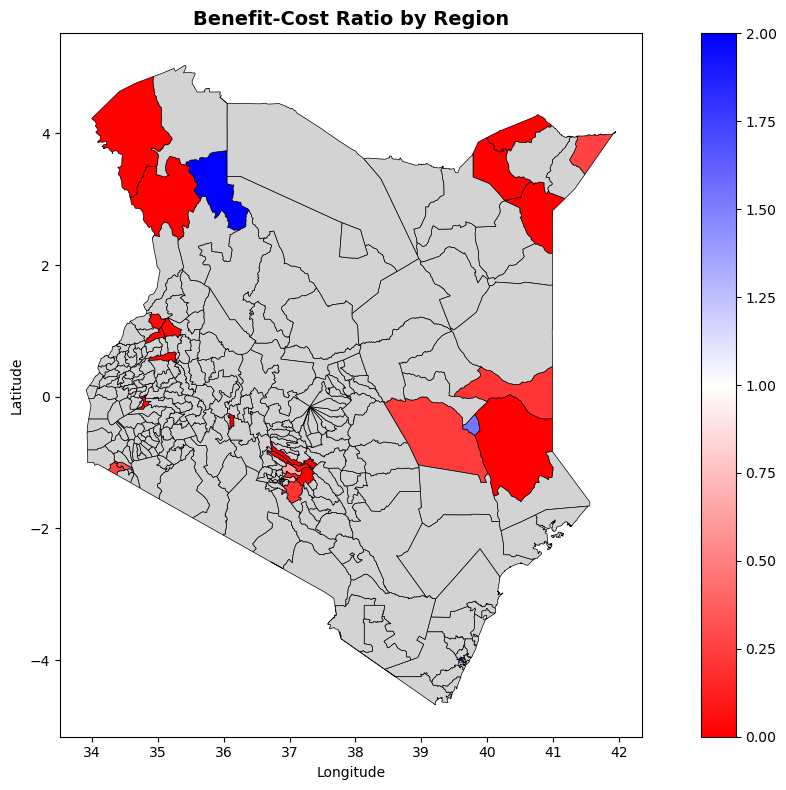

In [310]:
# Plot admin-level results
plot_bcr_map(results_fp)

(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'National CI Change Regional Contribution'}, xlabel='Longitude', ylabel='Latitude'>)

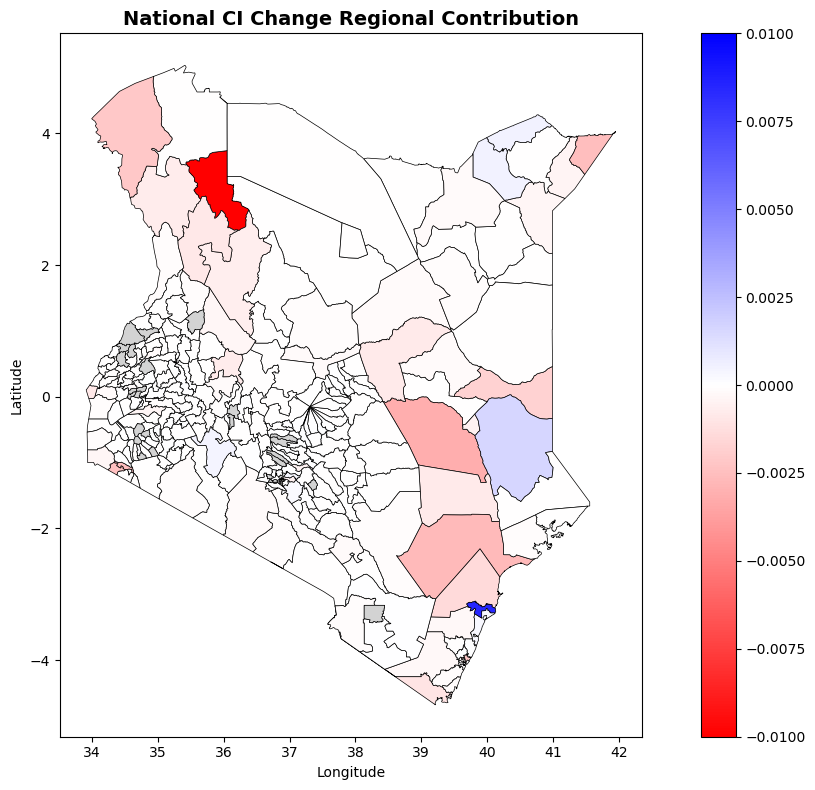

In [311]:
# Plot admin-level CI improvement
plot_ci_perc_map(ci_fp_diff)

(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'Within region CI change'}, xlabel='Longitude', ylabel='Latitude'>)

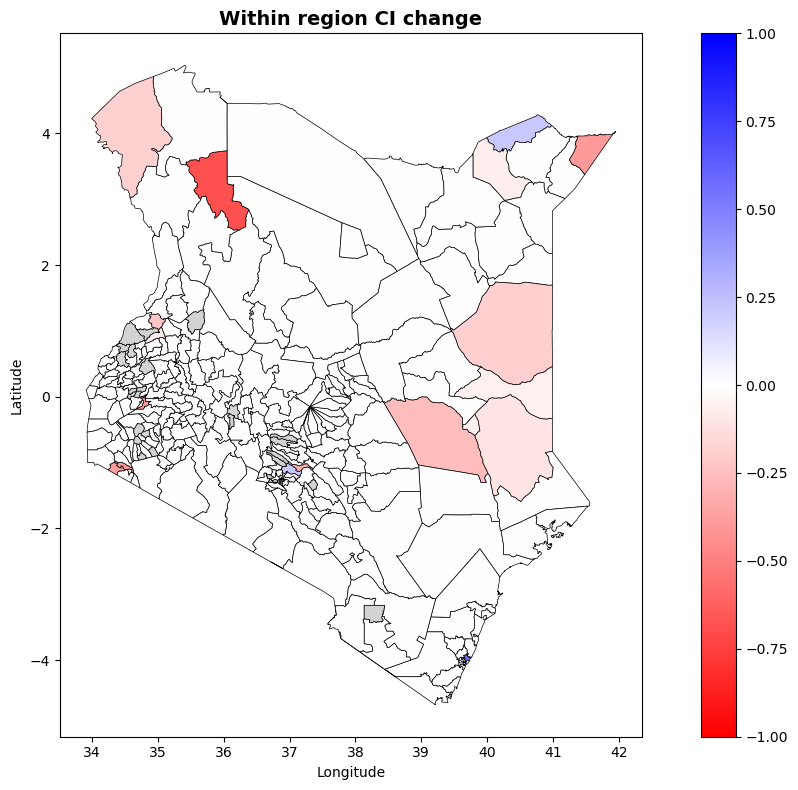

In [312]:
# Plot within-region CI change
plot_regional_ci_map(ci_fp_diff)

#### 2. Dry-proofing

In [313]:
results_dp = calculate_bcr(baseline, adapted_dp, cost_dp, time_period=time_period, discount_rate=discount_rate)
# Print top 10 admin regions (by BCR)
results_dp.sort_values('bcr', ascending=False)[:10]

,shapeName,geometry,annual_benefits,pv_benefits,adaptation_cost,bcr
167,Marakwet East,"MULTIPOLYGON (((35.64124 1.02196, 35.63161 1.0...",6.117754,1.574084e+02,5.185093,30.357870
166,Maragwa,"MULTIPOLYGON (((37.31896 -0.91925, 37.28665 -0...",792.269340,2.038490e+04,713.348291,28.576368
87,Kapseret,"MULTIPOLYGON (((35.2819 0.51103, 35.2848 0.509...",3238.690592,8.333074e+04,2986.296484,27.904378
261,Tetu,"MULTIPOLYGON (((36.62316 -0.39915, 36.63693 -0...",1823.014677,4.690574e+04,1696.810547,27.643474
7,Banissa,"MULTIPOLYGON (((39.99019 3.93289, 39.99651 3.9...",9885.264063,2.543455e+05,9232.372656,27.549312
115,Kipkelion East,"MULTIPOLYGON (((35.33233 -0.35141, 35.33823 -0...",12041.831028,3.098335e+05,11507.385938,26.924748
19,Borabu,"MULTIPOLYGON (((35.03285 -0.49613, 35.05242 -0...",821.988420,2.114957e+04,856.114063,24.704147
14,Bomachoge Chache,"MULTIPOLYGON (((34.71192 -0.71918, 34.71462 -0...",58674.160657,1.509672e+06,61936.843750,24.374382
116,Kipkelion West,"MULTIPOLYGON (((35.42408 -0.07599, 35.44428 -0...",1700.245419,4.374691e+04,1817.658008,24.067736
210,Nithi,"MULTIPOLYGON (((37.30777 -0.14954, 37.48941 -0...",792.472192,2.039012e+04,892.187402,22.854080


(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'Benefit-Cost Ratio by Region'}, xlabel='Longitude', ylabel='Latitude'>)

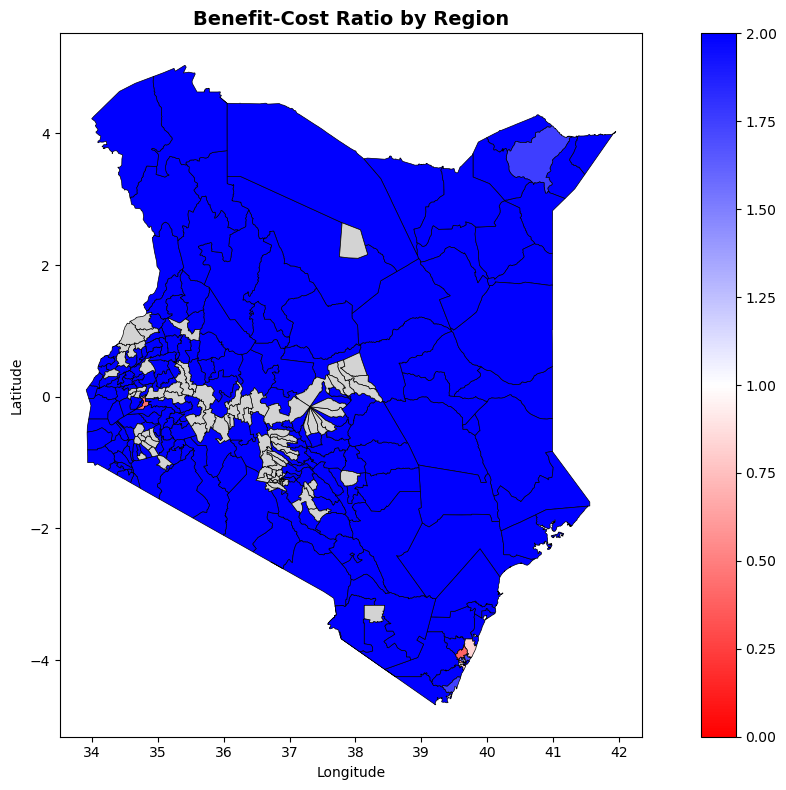

In [314]:
# Plot admin-level results
plot_bcr_map(results_dp)

(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'National CI Change Regional Contribution'}, xlabel='Longitude', ylabel='Latitude'>)

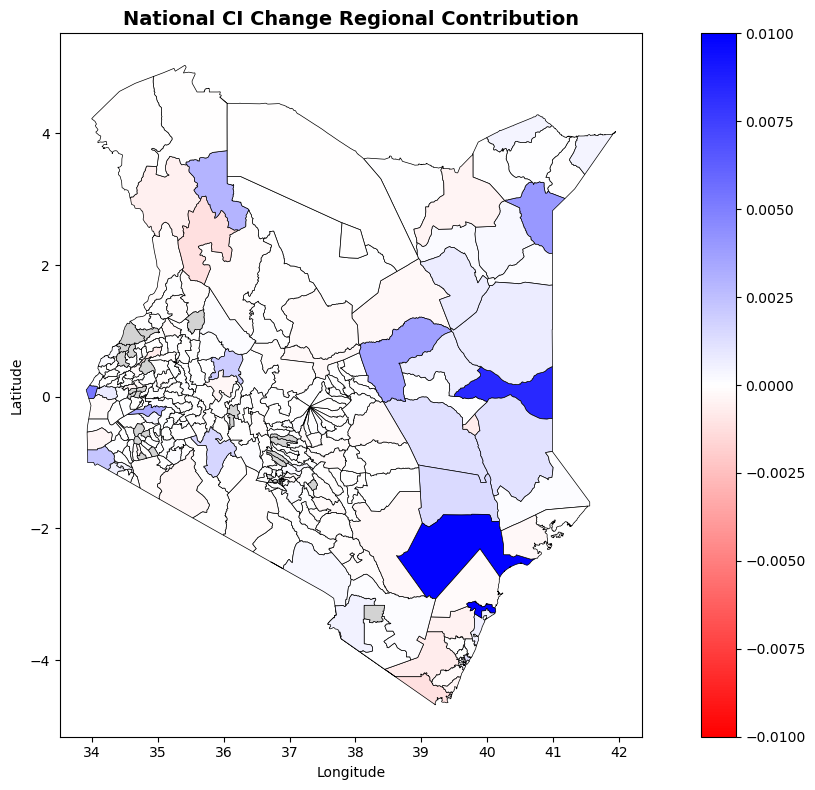

In [315]:
# Plot admin-level CI improvement
plot_ci_perc_map(ci_dp_diff)

In [316]:
ci_dp_diff.sort_values('Nat_Contrib_diff', ascending=False)[:10]
ci_dp_diff['Nat_Contrib_diff'].sum()

np.float64(0.0769150540293915)

(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'Within region CI change'}, xlabel='Longitude', ylabel='Latitude'>)

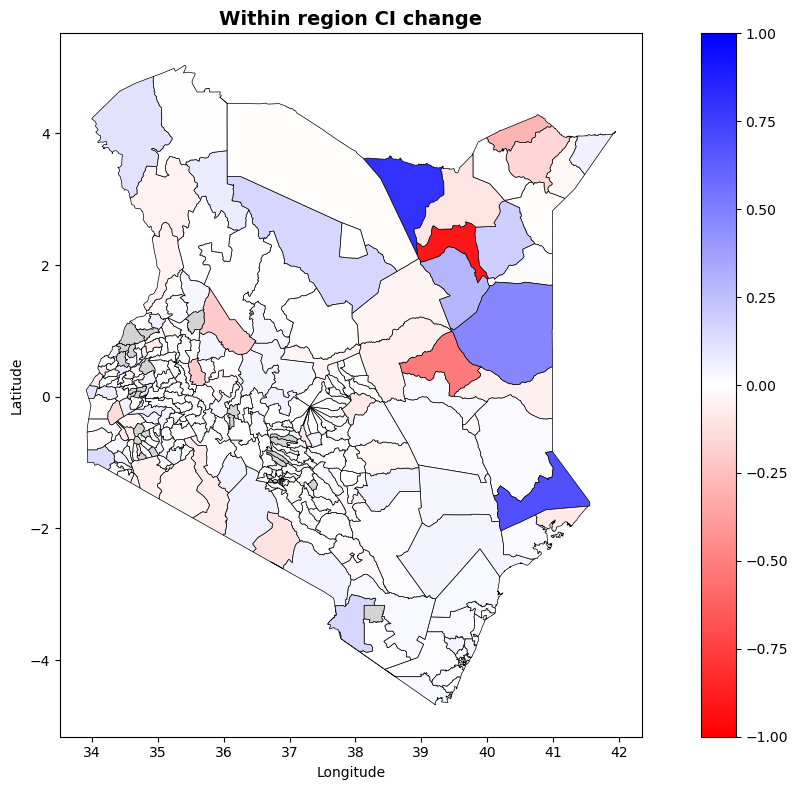

In [317]:
# Plot within-region CI change
plot_regional_ci_map(ci_dp_diff)

#### 3. Relocation

In [318]:
results_rl = calculate_bcr(baseline, adapted_rl, cost_rl, time_period=time_period, discount_rate=discount_rate)
# Print top 10 admin regions (by BCR)
results_rl.sort_values('bcr', ascending=False)[:10]

,shapeName,geometry,annual_benefits,pv_benefits,adaptation_cost,bcr
261,Tetu,"MULTIPOLYGON (((36.62316 -0.39915, 36.63693 -0...",16.713088,4.300238e+02,177.0,2.429513
187,Mukurweni,"MULTIPOLYGON (((37.16921 -0.63496, 37.15358 -0...",3239.913029,8.336220e+04,34845.0,2.392372
233,Ruiru,"MULTIPOLYGON (((36.9416 -1.17326, 36.95672 -1....",169176.060926,4.352860e+06,1855311.0,2.346162
23,Buret,"MULTIPOLYGON (((35.08535 -0.47233, 35.10057 -0...",11688.923565,3.007532e+05,128271.0,2.344671
115,Kipkelion East,"MULTIPOLYGON (((35.33233 -0.35141, 35.33823 -0...",22805.239296,5.867734e+05,262416.0,2.236043
279,Voi,"MULTIPOLYGON (((39.14652 -3.342, 39.10727 -3.4...",40259.211550,1.035860e+06,463416.0,2.235270
114,Kipipiri,"MULTIPOLYGON (((36.48968 -0.62242, 36.46803 -0...",70064.036316,1.802731e+06,814539.0,2.213192
160,Malindi,"MULTIPOLYGON (((39.80876 -3.29254, 39.80441 -3...",284899.448743,7.330396e+06,3322818.0,2.206078
247,Sotik,"MULTIPOLYGON (((35.26264 -0.67569, 35.25839 -0...",28036.643832,7.213762e+05,326997.0,2.206064
174,Matuga,"MULTIPOLYGON (((39.15967 -4.32634, 39.16744 -4...",60567.553125,1.558389e+06,708681.0,2.198999


(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'Benefit-Cost Ratio by Region'}, xlabel='Longitude', ylabel='Latitude'>)

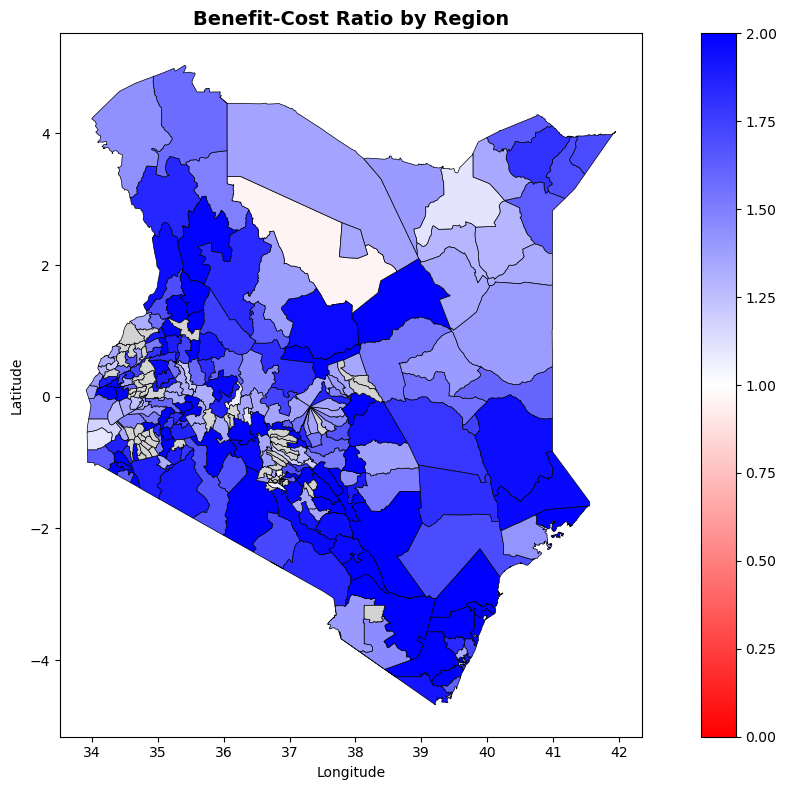

In [319]:
# Plot admin-level results
plot_bcr_map(results_rl)

(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'National CI Change Regional Contribution'}, xlabel='Longitude', ylabel='Latitude'>)

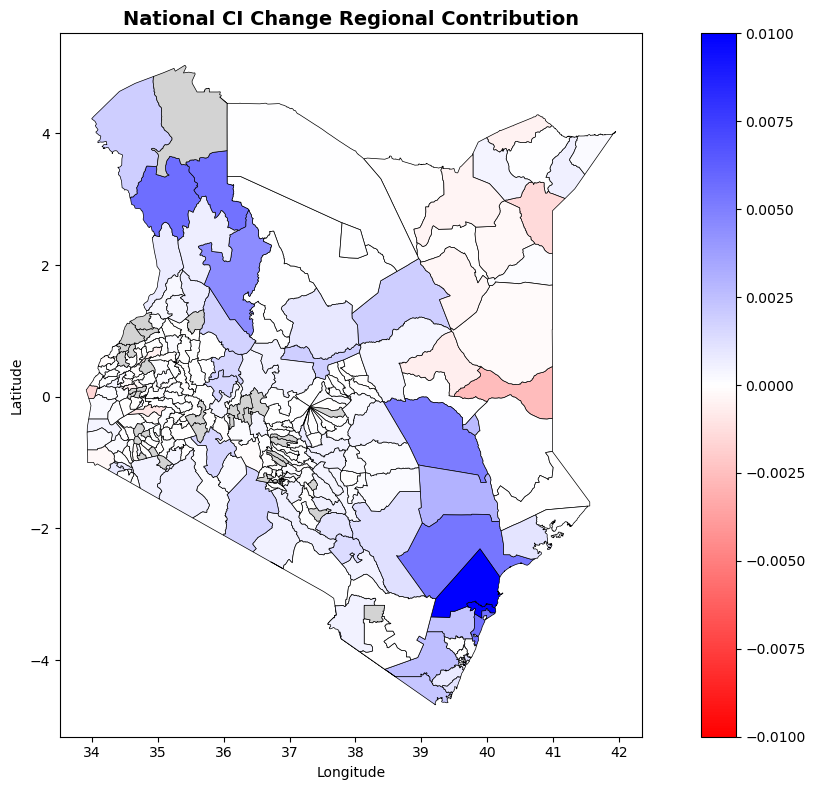

In [321]:
# Plot admin-level CI improvement
plot_ci_perc_map(ci_rl_diff)

(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'Within region CI change'}, xlabel='Longitude', ylabel='Latitude'>)

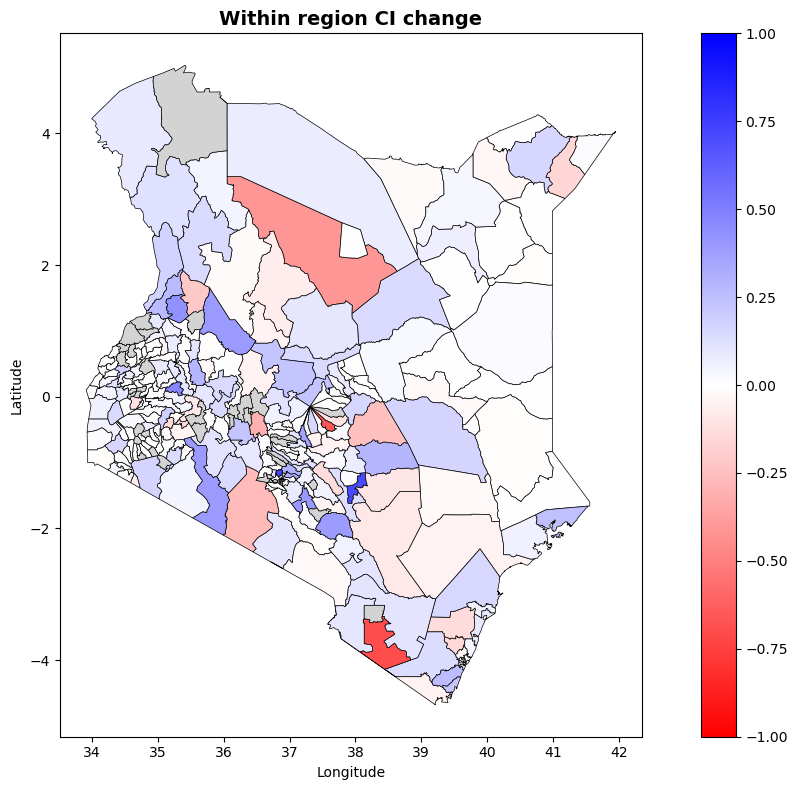

In [322]:
# Plot within-region CI change
plot_regional_ci_map(ci_rl_diff)

## GLOBAL

#### Define Functions

In [17]:
# Define function combining country inequality metric geopackages
def combine_national_bcr_metrics(country_list, model, ADM_level, fp_urban, fp_rp, rl_urban):
    '''
    Function for combining country's BCR metrics. This function takes as input
        - the list of countries to combine (ISO3 codes)
        - the flood model used (giri, jrc, or wri)
        - the administrative level to focus on (ADM0, ADM1, ADM2)
        - the GHS urbanization threshold for flood protection (21, 22, 23, etc.)
        - the design level of flood protection (50, 100)
        - the GHS urbanization threshold for relocation (11, 12, 23, etc.)
    The outputs of this function are:
        - a combined geodataframe of baseline risk metrics
        - a combined geodataframe of adapted (flood protection) risk metrics
        - a combined geodataframe of adapted (dry proofing) risk metrics
        - a combined geodataframe of adapted (relocation) risk metrics
        - a combined goedataframe of adaptation costs (flood protection)
        - a combined goedataframe of adaptation costs (dry proofing)
        - a combined geodataframe of adaptation costs (relocation)
    '''
    # Lists to store individual GeoDataFrames
    baseline_gdfs = []
    adapted_fp_gdfs = []
    adapted_dp_gdfs = []
    adapted_rl_gdfs = []
    cost_fp_gdfs = []
    cost_dp_gdfs = []
    cost_rl_gdfs = []
    # Loop over all countries in the country list
    for country in country_list:
        try:
            baseline_path = os.path.join("..", "data", "results", "flood_risk", "summary", "countries", 
                                                country, f"{country}_{ADM_level}_metrics_{model}-flood_AALs_baseline_capstock.gpkg")
            adapted_fp_path = os.path.join("..", "data", "results", "flood_risk", "summary", "countries",
                                          country, f"{country}_{ADM_level}_metrics_{model}-flood_AALs_adapted_fp_rp{fp_rp}_duc{fp_urban}_capstock.gpkg")
            adapted_dp_path = os.path.join("..", "data", "results", "flood_risk", "summary", "countries",
                                          country, f"{country}_{ADM_level}_metrics_{model}-flood_AALs_adapted_dp_capstock.gpkg")
            adapted_rl_path = os.path.join("..", "data", "results", "flood_risk", "summary", "countries",
                                          country, f"{country}_{ADM_level}_metrics_{model}-flood_AALs_adapted_rl_duc{rl_urban}_capstock.gpkg")
            cost_fp_path = os.path.join("..", "data", "results", "adaptation", "costs", "countries",
                                       country, f"{country}_adaptation-cost_fp_rp{fp_rp}_duc{fp_urban}_{ADM_level}.gpkg")
            cost_dp_path = os.path.join("..", "data", "results", "adaptation", "costs", "countries",
                                       country, f"{country}_adaptation-cost_dp_m-{model}_{ADM_level}.gpkg")
            cost_rl_path = os.path.join("..", "data", "results", "adaptation", "costs", "countries",
                                       country, f"{country}_adaptation-cost_rl_m-{model}_duc{rl_urban}_{ADM_level}.gpkg")
            # Read the GeoPackages
            gdf_baseline = gpd.read_file(baseline_path)
            gdf_adapted_fp = gpd.read_file(adapted_fp_path)
            gdf_adapted_dp = gpd.read_file(adapted_dp_path)
            gdf_adapted_rl = gpd.read_file(adapted_rl_path)
            gdf_cost_fp = gpd.read_file(cost_fp_path)
            gdf_cost_dp = gpd.read_file(cost_dp_path)
            gdf_cost_rl = gpd.read_file(cost_rl_path)
            # Append to list
            baseline_gdfs.append(gdf_baseline)
            adapted_fp_gdfs.append(gdf_adapted_fp)
            adapted_dp_gdfs.append(gdf_adapted_dp)
            adapted_rl_gdfs.append(gdf_adapted_rl)
            cost_fp_gdfs.append(gdf_cost_fp)
            cost_dp_gdfs.append(gdf_cost_dp)
            cost_rl_gdfs.append(gdf_cost_rl)
        except Exception as e:
            print(f"Error processing {country}: {e}")

    # Combine all GeoDataFrames
    combined_baseline_gdf = pd.concat(baseline_gdfs, ignore_index=True)
    combined_adapted_fp_gdf = pd.concat(adapted_fp_gdfs, ignore_index=True)
    combined_adapted_dp_gdf = pd.concat(adapted_dp_gdfs, ignore_index=True)
    combined_adapted_rl_gdf = pd.concat(adapted_rl_gdfs, ignore_index=True)
    combined_cost_fp_gdf = pd.concat(cost_fp_gdfs, ignore_index=True)
    combined_cost_dp_gdf = pd.concat(cost_dp_gdfs, ignore_index=True)
    combined_cost_rl_gdf = pd.concat(cost_rl_gdfs, ignore_index=True)
    
    return combined_baseline_gdf, combined_adapted_fp_gdf, combined_adapted_dp_gdf, combined_adapted_rl_gdf, combined_cost_fp_gdf, combined_cost_dp_gdf, combined_cost_rl_gdf


#### USER INPUTS

In [18]:
# Set figure parameters
ADM_level = 'ADM1'
model = 'jrc'
# Flood protection parameters
fp_urban = '30'
fp_RP = '100'
# Dry-proofing parameters
dry_proof_unit_cost = 0.2 # to get dry-proofing costs... % of average regional building unit cost
# Relocation parameters
rl_urban = '11'
relocation_cost = 2 # factor to multiply relocated capstock
# Benefit-Cost analysis parameters
time_period = 50 # years
discount_rate = 0.05

#### COMBINE DATA

In [19]:
# Load countries from config file
with open(os.path.join("..", "config", "config.yaml"), "r") as file:
    config = yaml.safe_load(file)
countries = config.get("iso_codes", [])

In [20]:
baseline, adapted_fp, adapted_dp, adapted_rl, cost_fp, cost_dp, cost_rl = combine_national_bcr_metrics(countries, model, ADM_level, fp_urban, fp_RP, rl_urban)

Error processing BRA: ..\data\results\flood_risk\summary\countries\BRA\BRA_ADM1_metrics_jrc-flood_AALs_baseline_capstock.gpkg: No such file or directory
Error processing DMA: ..\data\results\flood_risk\summary\countries\DMA\DMA_ADM1_metrics_jrc-flood_AALs_baseline_capstock.gpkg: No such file or directory
Error processing IDN: ..\data\results\flood_risk\summary\countries\IDN\IDN_ADM1_metrics_jrc-flood_AALs_baseline_capstock.gpkg: No such file or directory
Error processing IND: ..\data\results\flood_risk\summary\countries\IND\IND_ADM1_metrics_jrc-flood_AALs_baseline_capstock.gpkg: No such file or directory


In [22]:
# Fix some of the adaptation data
# Adjust flood-protection cost from millions to actual value
cost_fp['adaptation_cost']*=1e6
cost_fp['adj_adaptation_cost']*=1e6
# Add dry-proofing costs
cost_dp['adaptation_cost'] = cost_dp['average_unit_cost'] * dry_proof_unit_cost * cost_dp['area_dry-proofed']
# Add relocation costs
cost_rl['adaptation_cost'] = cost_rl['capstock_relocated'] * relocation_cost

#### RUN BCA

In [23]:
# Define BCR function
def calculate_bcr(baseline_df, adapted_df, cost_df, time_period=20, discount_rate=0.03):
    # merge all dataframes on shapename
    merged_df = baseline_df[['shapeName', 'total_losses']].merge(
        adapted_df[['shapeName', 'total_losses']],
        on='shapeName',
        suffixes=('_baseline', '_adapted')
    ).merge(
        cost_df[['shapeName', 'adaptation_cost']],
        on='shapeName'
    )
    # Calculate actual benefits
    merged_df['annual_benefits'] = (
        merged_df['total_losses_baseline'] -
        merged_df['total_losses_adapted']
    )
    # Calculate present value of benefits over time period
    if discount_rate ==0:
        pv_factor = time_period
    else:
        pv_factor = (1-(1 + discount_rate)** -time_period) / discount_rate
    merged_df['pv_benefits'] = merged_df['annual_benefits'] * pv_factor
    # Calculate benefit-cost ratio
    merged_df['bcr'] = merged_df['pv_benefits'] / merged_df['adaptation_cost']
    # Handle division by 0 or negative costs
    merged_df['bcr'] = merged_df['bcr'].replace([np.inf, -np.inf], np.nan)
    # Create results dataframe
    results_df = merged_df[[
        'shapeName',
        'annual_benefits',
        'pv_benefits',
        'adaptation_cost',
        'bcr'
    ]]
    # Pull geometry
    results_gdf = baseline_df[['shapeName', 'geometry']].merge(
        results_df,
        on='shapeName',
        how='right'
    )

    return results_gdf

In [25]:
# Run benefit-cost analysis
results_fp = calculate_bcr(baseline, adapted_fp, cost_fp, time_period=time_period, discount_rate=discount_rate)
results_dp = calculate_bcr(baseline, adapted_dp, cost_dp, time_period=time_period, discount_rate=discount_rate)
results_rl = calculate_bcr(baseline, adapted_rl, cost_rl, time_period=time_period, discount_rate=discount_rate)

In [34]:
results_fp.sort_values('annual_benefits', ascending=False)[10:]

,shapeName,geometry,annual_benefits,pv_benefits,adaptation_cost,bcr
1181,Western Province,"POLYGON ((29.04087 -2.73806, 29.0405 -2.73944,...",7.372397e+08,1.345899e+10,1.602674e+08,83.978333
1179,Western Province,"POLYGON ((29.04087 -2.73806, 29.0405 -2.73944,...",7.372397e+08,1.345899e+10,8.367824e+08,16.084220
349,Littoral,"MULTIPOLYGON (((10.50106 4.91157, 10.49049 4.6...",6.585135e+08,1.202177e+10,8.566539e+07,140.334074
348,Littoral,"POLYGON ((2.34601 6.34912, 2.35779 6.38446, 2....",6.585135e+08,1.202177e+10,8.566539e+07,140.334074
351,Littoral,"MULTIPOLYGON (((10.50106 4.91157, 10.49049 4.6...",6.585135e+08,1.202177e+10,9.101789e+08,13.208143
...,...,...,...,...,...,...
1713,Southern Province,"POLYGON ((29.95923 -2.3269, 29.95815 -2.32821,...",-2.333065e+08,-4.259225e+09,1.396384e+08,-30.501812
1738,Western Province,"MULTIPOLYGON (((79.84479 7.27295, 79.85017 7.2...",-4.088132e+08,-7.463263e+09,1.602674e+08,-46.567556
1739,Western Province,"POLYGON ((29.04087 -2.73806, 29.0405 -2.73944,...",-4.088132e+08,-7.463263e+09,1.602674e+08,-46.567556
1736,Western Province,"MULTIPOLYGON (((79.84479 7.27295, 79.85017 7.2...",-4.088132e+08,-7.463263e+09,8.367824e+08,-8.919001


In [ ]:
# Plot a map of the metrics
# Map parameters
figsize = (15, 10)
colormap = plt.cm.bwr.reversed()
colormap_min = -1
colormap_max = 1
metric = "CI_avg"
label = "Concentration Index"
hatch_pattern = "//////"  # hashes for disagreement
mpl.rcParams['hatch.linewidth'] = 0.4
mpl.rcParams['hatch.color'] = 'black'

# Create a copy of original dataframe for mapping
map_df = gdf_plot.copy()
# Simplify the admin boundaries (useful for plotting)
map_df['geometry'] = map_df['geometry'].simplify(tolerance=0.1)

fig, ax = plt.subplots(1, 1, figsize=figsize)

# Create a basemap of the world
world_url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
try:
    world = gpd.read_file(world_url)
    world.plot(ax=ax, color='lightgray')
except Exception as e:
    print(f"Couldn't load world map from URL: {e}")
    print("Proceeding without background world map")

# Plot data for available countries
if metric in map_df.columns:
    # Create a mask for rows with non-null metric values
    valid_data = ~map_df[metric].isna()

    # Colormap normalizatoin
    norm = Normalize(vmin=colormap_min, vmax=colormap_max)

    # Plot coutnries with data using metric to control color
    map_df[valid_data].plot(column=metric,
                            ax=ax,
                            cmap=colormap,
                            norm=norm,
                            edgecolor='gray',
                            linewidth=0.2,
                            alpha=0.9)
    
    # 2) HATCH ONLY countries with NO sign agreement
    disagree = (map_df['sign_agree'] == False) & valid_data
    if disagree.any():
        map_df.loc[disagree].plot(
            ax=ax,
            facecolor="none",
            edgecolor='grey',
            linewidth=0.2,
            hatch=hatch_pattern,
            alpha=0.9,
        )

    sm = ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    
    # Create the colorbar with custom positioning
    cax = fig.add_axes([0.15, 0.2, 0.7, 0.03])  # [left, bottom, width, height]
    cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
    # Create evenly spaced ticks (5 ticks including min and max)
    tick_values = np.linspace(colormap_min, colormap_max, 5)
    cbar.set_ticks(tick_values)
    # Format the tick labels to have fewer decimal places
    cbar.set_ticklabels([f"{v:.2f}" for v in tick_values])
    cbar.set_label(label)

# # Add title explicitly to the ax object, not using plt.title
# ax.set_title(title, fontsize=15, pad=20)

# Turn off the axis
ax.set_axis_off()

plt.show()